# Spotify Top 100 Country Music Analysis (Data from January 9, 2024)

## Dataset Introduction
This analysis uses the dataset "Spotify Top 100 Country 9/1/24 (w/ Audio Features)" from Kaggle. The dataset captures the 100 most popular country music tracks on Spotify along with their detailed characteristics.

The dataset includes:
- Basic metadata: release dates, song duration, popularity metrics
- Audio features: danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo

Through analyzing this data, we can gain deep insights into current country music trends and explore relationships between musical features and popularity, providing valuable information for music analysts, industry professionals, and country music enthusiasts.

Data Source: Kaggle - https://www.kaggle.com/datasets/thebumpkin/spotify-top-100-country-9124-w-audio-features

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thebumpkin/spotify-top-100-country-9124-w-audio-features")

print("Path to dataset files:", path)


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 6.46k/6.46k [00:00<00:00, 6.62MB/s]

Extracting files...
Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\thebumpkin\spotify-top-100-country-9124-w-audio-features\versions\1


In [8]:
import os

# List all files in the directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


C:\Users\user\.cache\kagglehub\datasets\thebumpkin\spotify-top-100-country-9124-w-audio-features\versions\1\CountryHits240901.csv


In [9]:
import pandas as pd

file_path = os.path.join(path, "CountryHits240901.csv")  # Adjust file name if needed
df = pd.read_csv(file_path)


In [10]:
print(df.head())

   Rank                                          Track        Artist1  \
0     1  I Remember Everything (feat. Kacey Musgraves)     Zach Bryan   
1     2                                       Fast Car     Luke Combs   
2     3                                  World on Fire     Nate Smith   
3     4                                     Last Night  Morgan Wallen   
4     5                                  I Can Feel It     Kane Brown   

           Artist2                      Album     Release  Popularity  \
0  Kacey Musgraves                 Zach Bryan  2023-08-25          89   
1              NaN                Gettin' Old  2023-03-24          84   
2              NaN        NATE SMITH (DELUXE)  2023-04-28          76   
3              NaN  3 Songs At A Time Sampler  2023-03-03          83   
4              NaN              I Can Feel It  2023-09-21          68   

   Duration  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0    227195         0.429   0.453    0    -7.746   

In [11]:
df.describe()

,Rank,Popularity,Duration,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,64.230000,199394.960000,0.562360,0.716310,4.930000,-5.588640,0.810000,0.039120,0.176438,0.006681,0.156658,0.503010,124.964450
std,29.011492,13.597278,29159.812145,0.087599,0.125574,3.385217,1.518451,0.394277,0.012614,0.203237,0.059912,0.097476,0.182414,29.124518
min,1.000000,36.000000,144426.000000,0.353000,0.431000,0.000000,-11.066000,0.000000,0.024100,0.000086,0.000000,0.028700,0.146000,66.041000
25%,25.750000,55.750000,179553.500000,0.500750,0.631250,2.000000,-6.223500,1.000000,0.029775,0.018800,0.000000,0.097550,0.376000,103.704250
50%,50.500000,67.000000,191493.000000,0.569000,0.745500,5.000000,-5.375000,1.000000,0.034850,0.118000,0.000000,0.115000,0.470000,123.964500
75%,75.250000,74.000000,214696.500000,0.629750,0.815250,8.000000,-4.589750,1.000000,0.045450,0.234750,0.000004,0.183500,0.633000,142.580500
max,100.000000,89.000000,290892.000000,0.738000,0.928000,11.000000,-2.695000,1.000000,0.087300,0.874000,0.598000,0.582000,0.963000,203.912000


In [13]:
top_10_popular_tracks = df.sort_values(by='Popularity', ascending=False).head(10)
print("top_10_popular_tracks")
print(top_10_popular_tracks)

top_10_popular_tracks
    Rank                                          Track        Artist1  \
0      1  I Remember Everything (feat. Kacey Musgraves)     Zach Bryan   
70    71                            One Thing At A Time  Morgan Wallen   
34    35                               Thinkin’ Bout Me  Morgan Wallen   
1      2                                       Fast Car     Luke Combs   
33    34                      Where the Wild Things Are     Luke Combs   
3      4                                     Last Night  Morgan Wallen   
66    67                                      You Proof  Morgan Wallen   
94    95                                       Buy Dirt   Jordan Davis   
47    48                       The Kind of Love We Make     Luke Combs   
17    18                                        We Ride   Bryan Martin   

            Artist2                          Album     Release  Popularity  \
0   Kacey Musgraves                     Zach Bryan  2023-08-25          89   
70     

 There are 18 songs in featuring in the TOP 100. It represents 18% of the songs


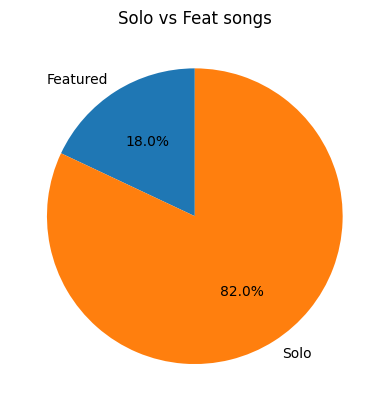

In [14]:
feat = df['Artist2'].value_counts().sum()
data_feat = [feat, 100-feat]
labels = ['Featured', 'Solo']
print(f" There are {feat} songs in featuring in the TOP 100. It represents {feat}% of the songs")
plt.pie(data_feat, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Solo vs Feat songs')
plt.show()

There are 16 singers with more than 1 song on the TOP 100 country


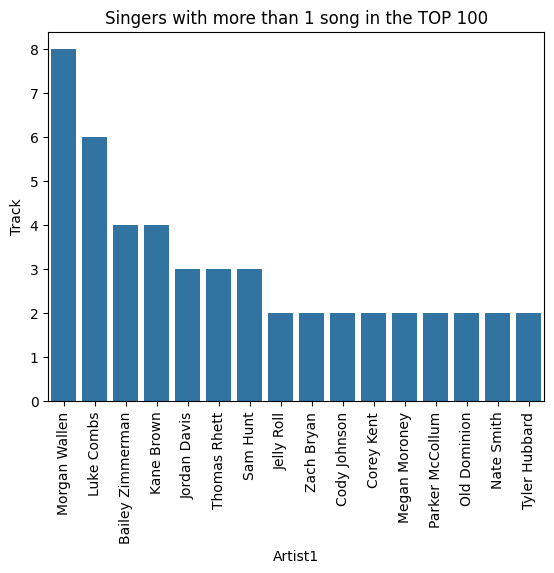

In [15]:
multi_song = df.groupby('Artist1')['Track'].count().sort_values(ascending=False).reset_index()
multi_singers = multi_song[multi_song['Track'] >= 2]
multi_singer_count = len(multi_singers)
print(f'There are {multi_singer_count} singers with more than 1 song on the TOP 100 country')

sns.barplot(data=multi_singers, x='Artist1', y='Track')
plt.xticks(rotation=90)
plt.title('Singers with more than 1 song in the TOP 100')
plt.show()


In [16]:
# Count occurrences in Artist1
artist1_counts = df['Artist1'].value_counts().reset_index()
artist1_counts.columns = ['Artist', 'Count_Artist1']

# Count occurrences in Artist2
artist2_counts = df['Artist2'].value_counts().reset_index()
artist2_counts.columns = ['Artist', 'Count_Artist2']

# Merge the counts
combined_counts = pd.merge(artist1_counts, artist2_counts, on='Artist', how='outer').fillna(0)

# Convert counts to integer
combined_counts['Count_Artist1'] = combined_counts['Count_Artist1'].astype(int)
combined_counts['Count_Artist2'] = combined_counts['Count_Artist2'].astype(int)

# Order by Count_Artist1 first and Count_Artist2 second
ordered_counts = combined_counts.sort_values(by=['Count_Artist1', 'Count_Artist2'], ascending=[False, False])

# Display the result
print(ordered_counts)


              Artist  Count_Artist1  Count_Artist2
0      Morgan Wallen              8              3
1         Luke Combs              6              1
2         Kane Brown              4              0
3   Bailey Zimmerman              4              0
4       Jordan Davis              3              0
..               ...            ...            ...
73   Priscilla Block              0              1
74     Katelyn Brown              0              1
75   Miranda Lambert              0              1
76     Lauren Alaina              0              1
77        Luke Bryan              0              1

[78 rows x 3 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_34612\3854837020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_counts['Total_Count'] = filtered_counts['Count_Artist1'] + filtered_counts['Count_Artist2']


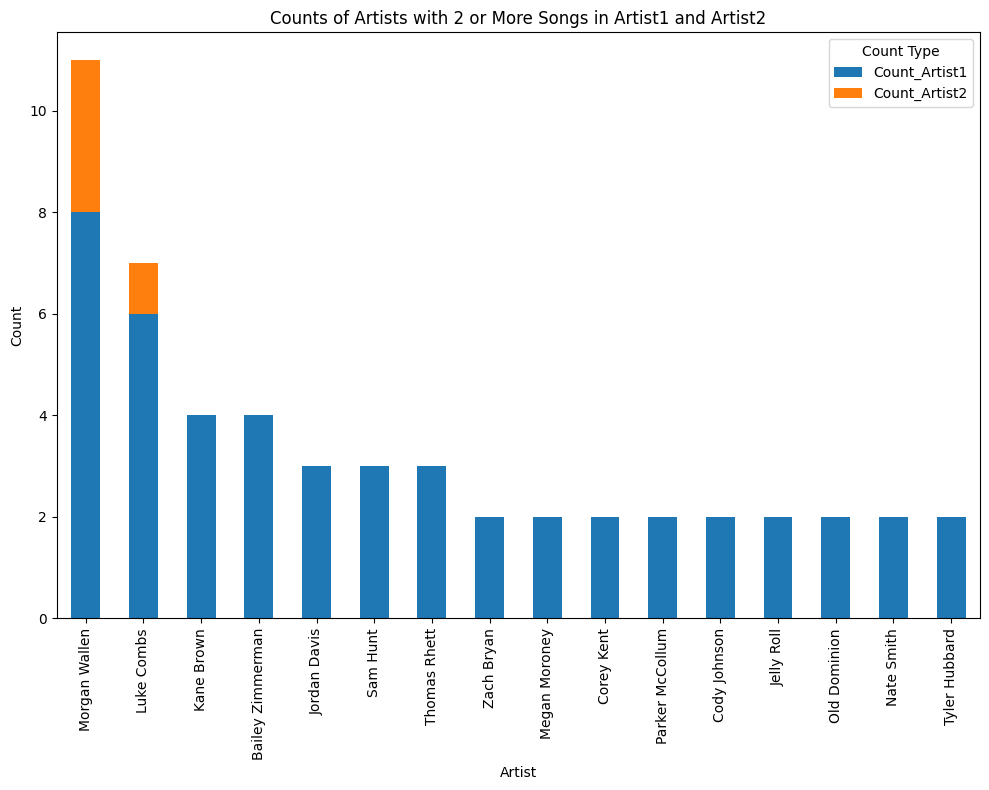

In [17]:
# Filter artists with at least 2 songs in Artist1 or Artist2
filtered_counts = combined_counts[(combined_counts['Count_Artist1'] >= 2) | (combined_counts['Count_Artist2'] >= 2)]

# Add a Total_Count column
filtered_counts['Total_Count'] = filtered_counts['Count_Artist1'] + filtered_counts['Count_Artist2']

# Sort by total count
sorted_filtered_counts = filtered_counts.sort_values(by='Total_Count', ascending=False)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
sorted_filtered_counts.set_index('Artist')[['Count_Artist1', 'Count_Artist2']].plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title
ax.set_ylabel('Count')
ax.set_title('Counts of Artists with 2 or More Songs in Artist1 and Artist2')
plt.xticks(rotation=90)
plt.legend(title='Count Type', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


<h1> Correlation Between Ranking and Song style

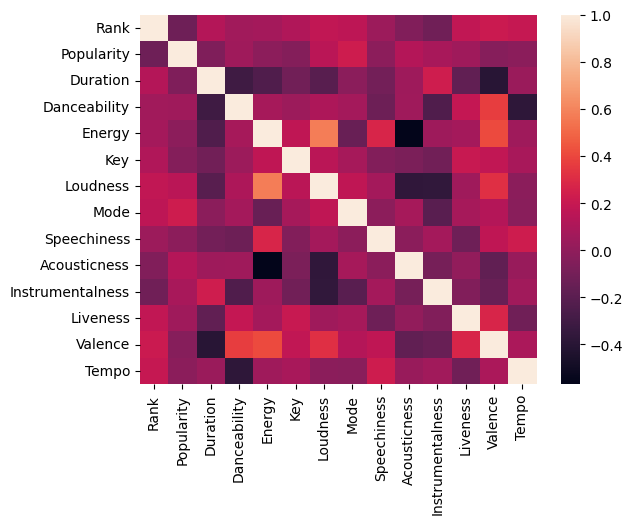

In [18]:
numeric = df.select_dtypes(include=['number'])
corr = numeric.corr()
sns.heatmap(data=corr)
plt.show()

Ranking and song style are not directly correlated

<h2> Rank and Popularity

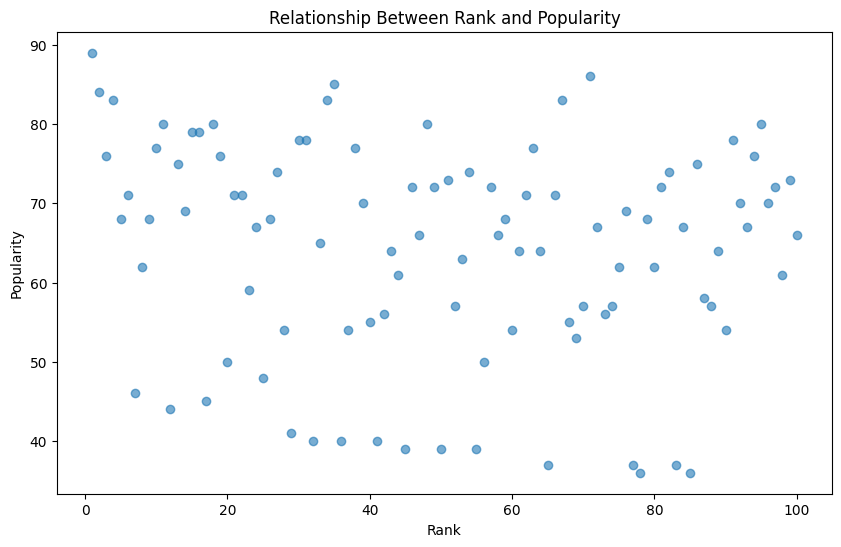

In [19]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Popularity'], alpha=0.6)

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.title('Relationship Between Rank and Popularity')

# Show the plot
plt.show()

In [32]:
# Select features
X = df[['Rank', 'Popularity']]
y = df['Rank']  # Assuming you want to classify based on rank

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



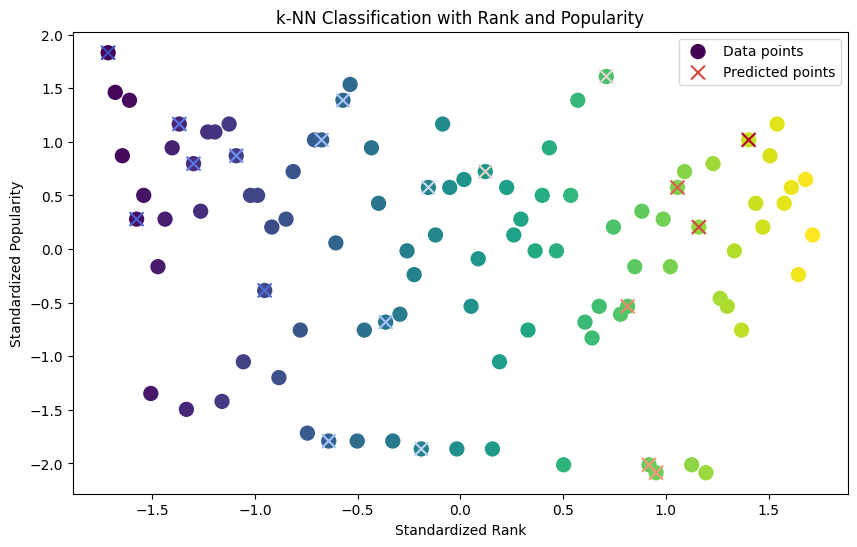

In [33]:
# Initialize and fit the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=100, cmap='viridis', label='Data points')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=100, cmap='coolwarm', marker='x', label='Predicted points')
plt.xlabel('Standardized Rank')
plt.ylabel('Standardized Popularity')
plt.title('k-NN Classification with Rank and Popularity')
plt.legend()
plt.show()

<h2> Rand and Danceability

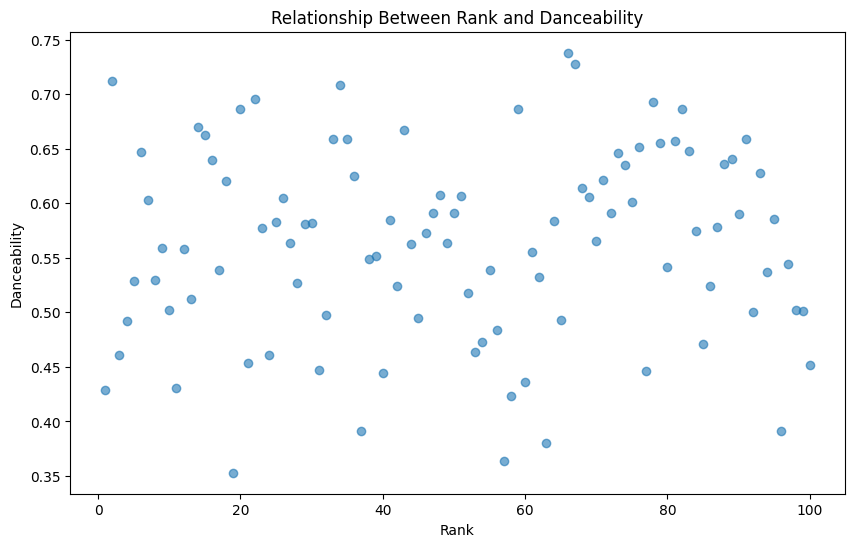

In [34]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Danceability'], alpha=0.6)

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Danceability')
plt.title('Relationship Between Rank and Danceability')

# Show the plot
plt.show()

<h2> Rank and Energy

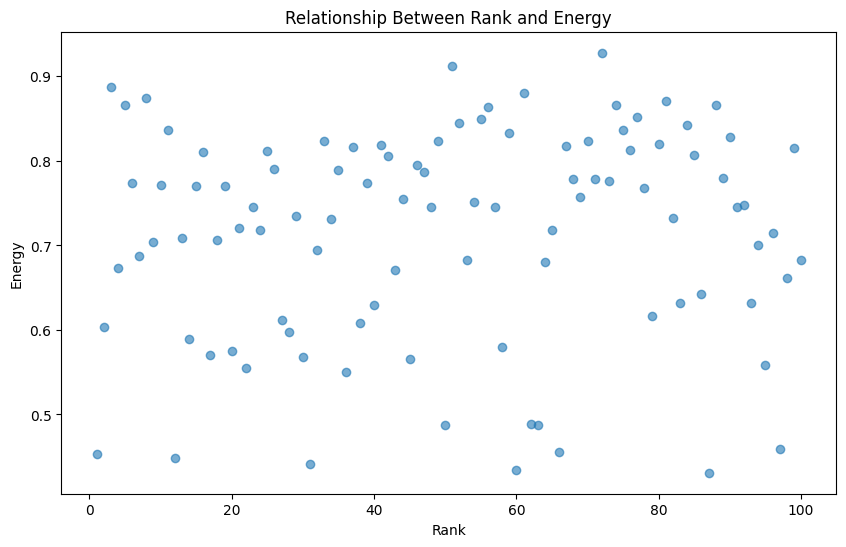

In [36]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Energy'], alpha=0.6)

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Energy')
plt.title('Relationship Between Rank and Energy')

# Show the plot
plt.show()

<h2> Rank and Key

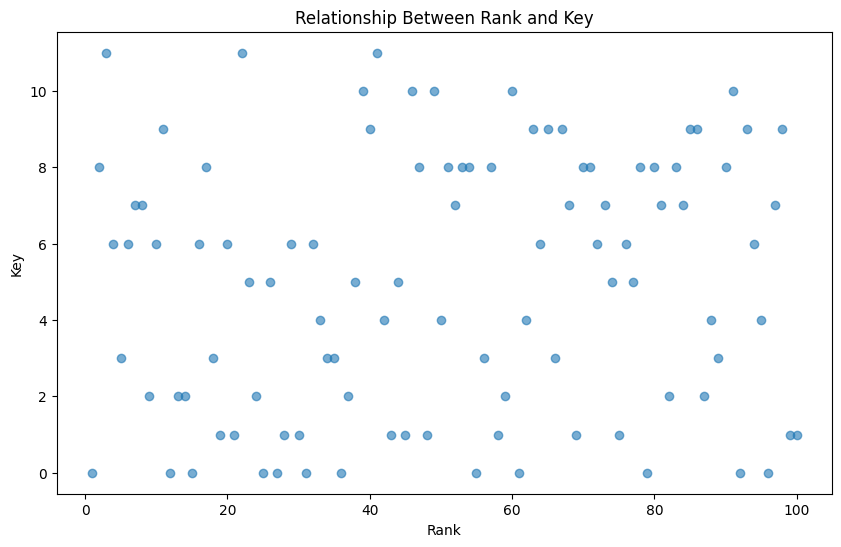

In [38]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Key'], alpha=0.6)

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Key')
plt.title('Relationship Between Rank and Key')

# Show the plot
plt.show()

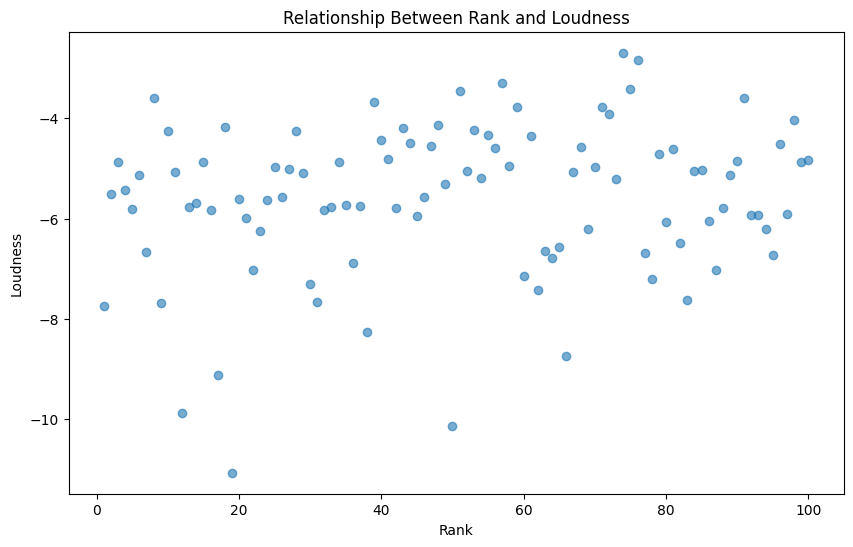

In [39]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Loudness'], alpha=0.6)

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Loudness')
plt.title('Relationship Between Rank and Loudness')

# Show the plot
plt.show()

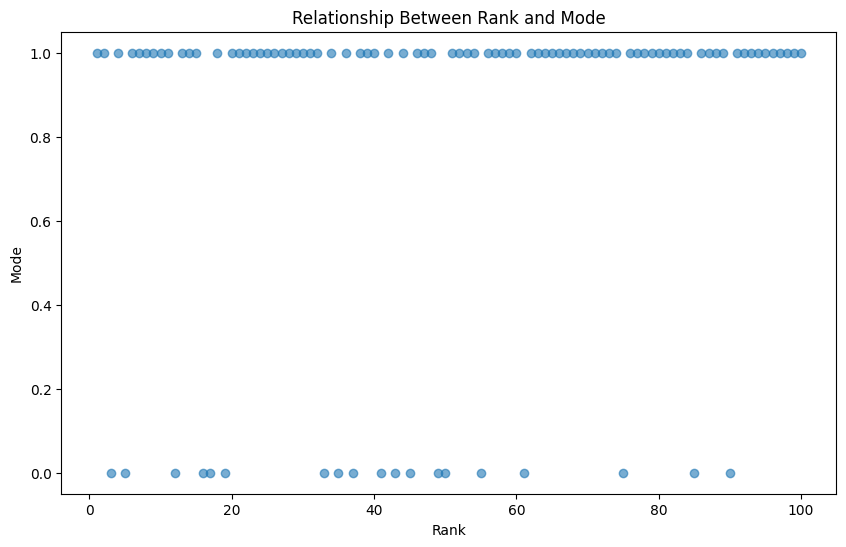

In [40]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Mode'], alpha=0.6)

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Mode')
plt.title('Relationship Between Rank and Mode')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34612\3053737331.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Rank', y='Speechiness', palette='viridis')


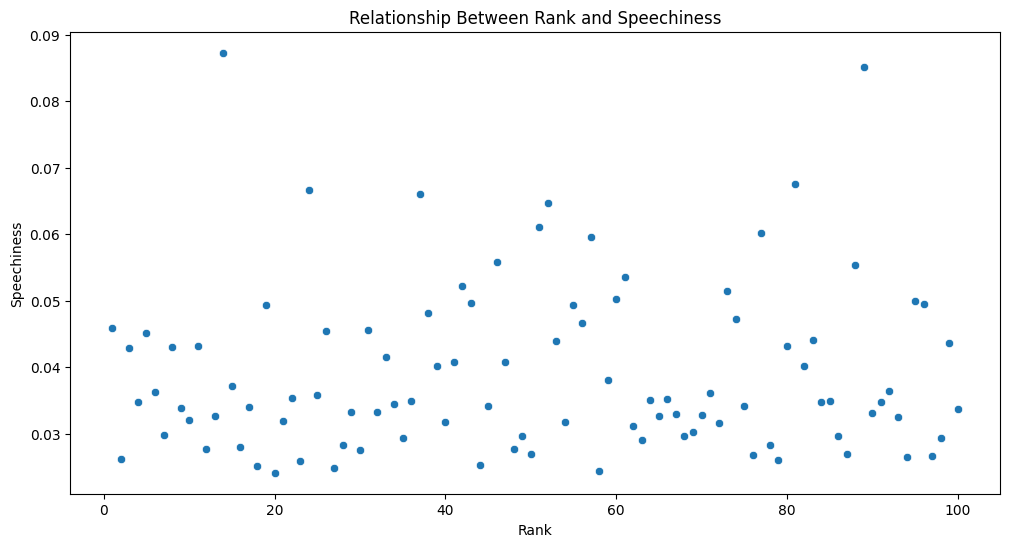

In [41]:
# Create a bar plot to show the relationship between Rank and Mode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rank', y='Speechiness', palette='viridis')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Speechiness')
plt.title('Relationship Between Rank and Speechiness')

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_34612\1460169954.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Rank', y='Acousticness', palette='viridis')


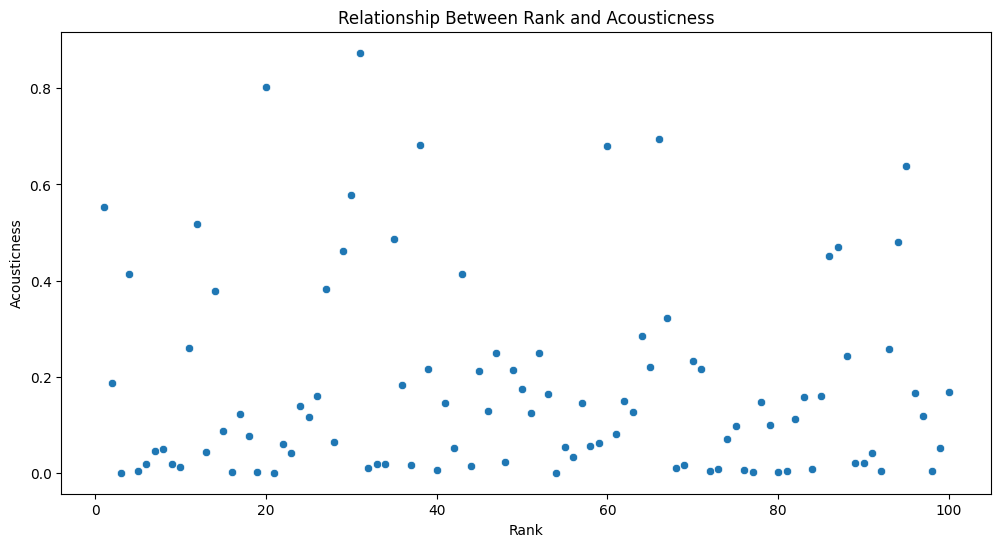

In [42]:
# Create a bar plot to show the relationship between Rank and Mode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rank', y='Acousticness', palette='viridis')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Acousticness')
plt.title('Relationship Between Rank and Acousticness')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34612\2175976965.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Rank', y='Instrumentalness', palette='viridis')


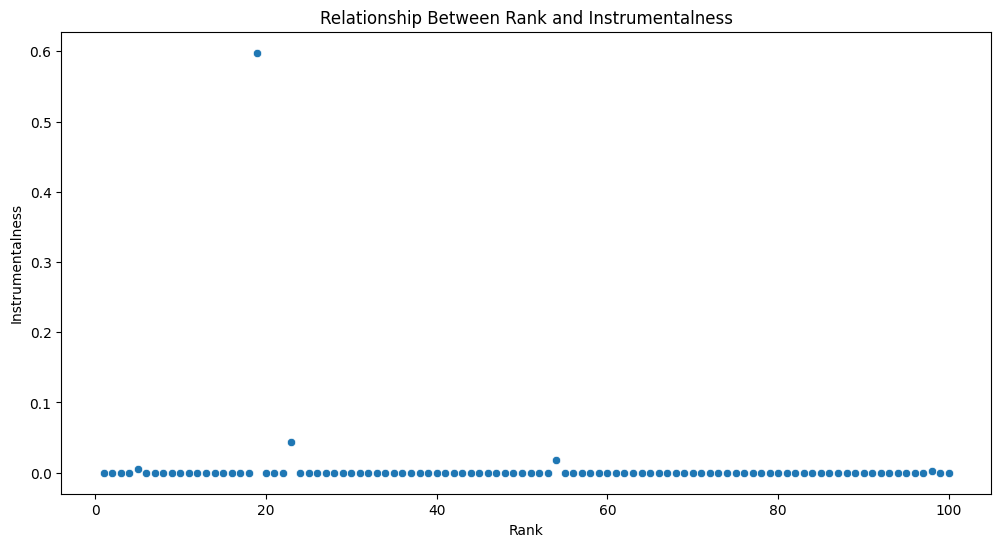

In [43]:
# Create a bar plot to show the relationship between Rank and Mode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rank', y='Instrumentalness', palette='viridis')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Instrumentalness')
plt.title('Relationship Between Rank and Instrumentalness')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34612\1314248746.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Rank', y='Liveness', palette='viridis')


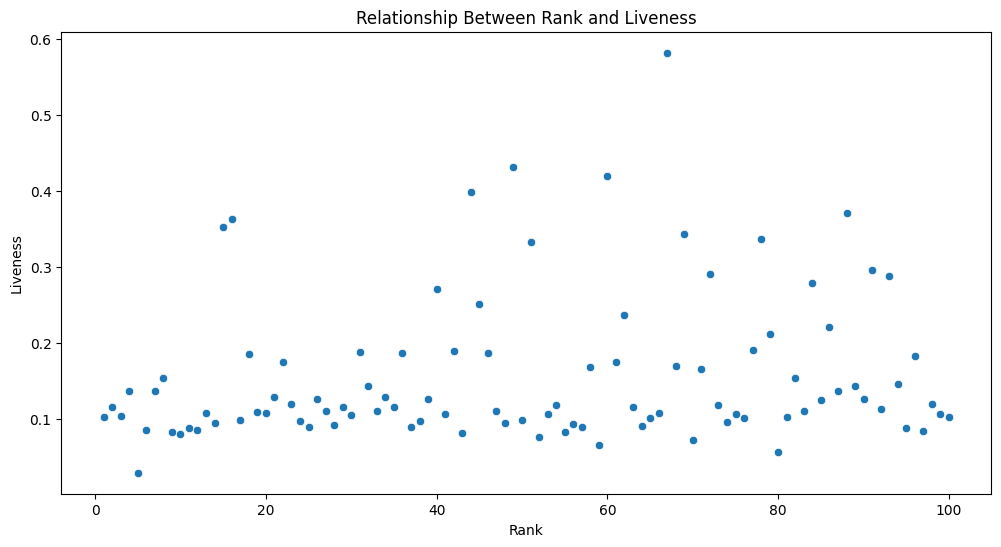

In [44]:
# Create a bar plot to show the relationship between Rank and Mode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rank', y='Liveness', palette='viridis')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Liveness')
plt.title('Relationship Between Rank and Liveness')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34612\4181410164.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Rank', y='Valence', palette='viridis')


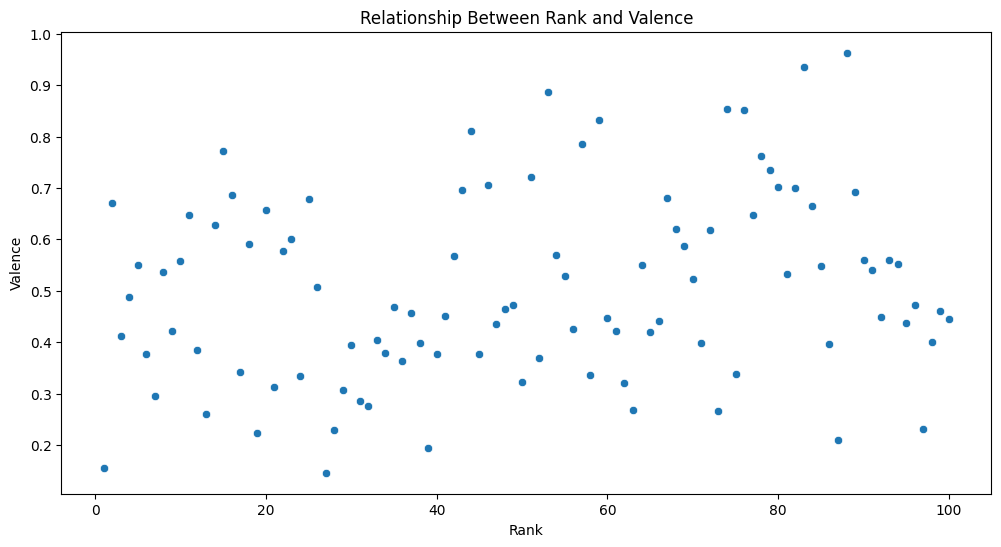

In [45]:
# Create a bar plot to show the relationship between Rank and Mode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rank', y='Valence', palette='viridis')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.title('Relationship Between Rank and Valence')

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_34612\2479077525.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Rank', y='Tempo', palette='viridis')


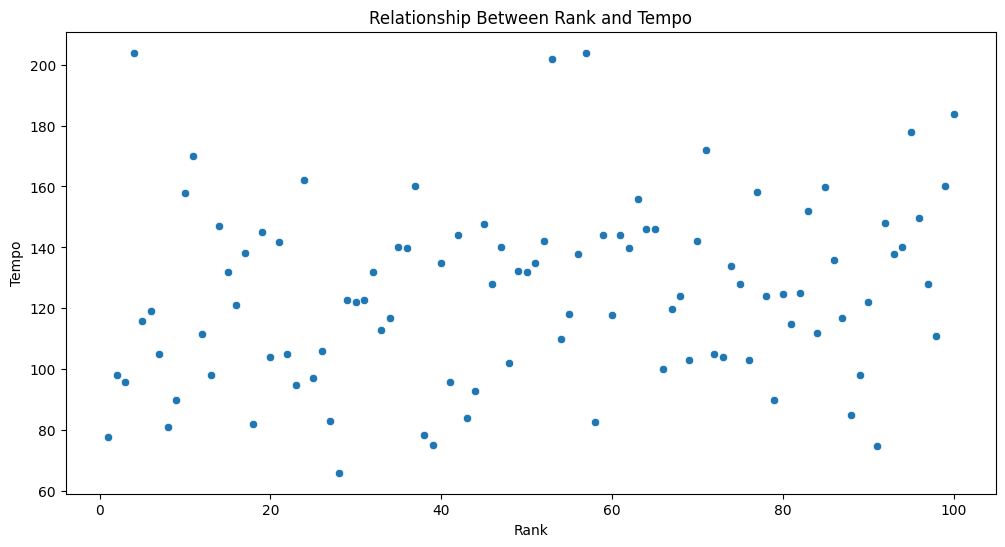

In [46]:
# Create a bar plot to show the relationship between Rank and Mode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rank', y='Tempo', palette='viridis')

# Set the labels and title
plt.xlabel('Rank')
plt.ylabel('Tempo')
plt.title('Relationship Between Rank and Tempo')

# Show the plot
plt.show()

<h1> Song style in top 100

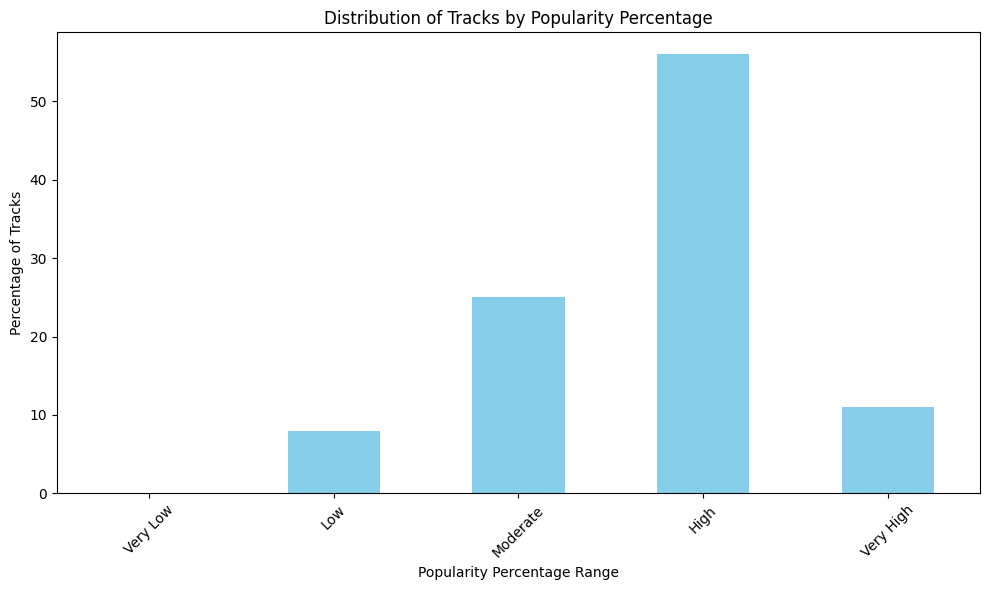

In [51]:
# Define the percentage ranges
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Categorize the popularity
df['Popularity_Category'] = pd.cut(df['Popularity'], bins=bins, labels=labels, right=False)

# Calculate the percentage of tracks in each category
popularity_percentage = df['Popularity_Category'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
popularity_percentage.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Popularity Percentage Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Popularity Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

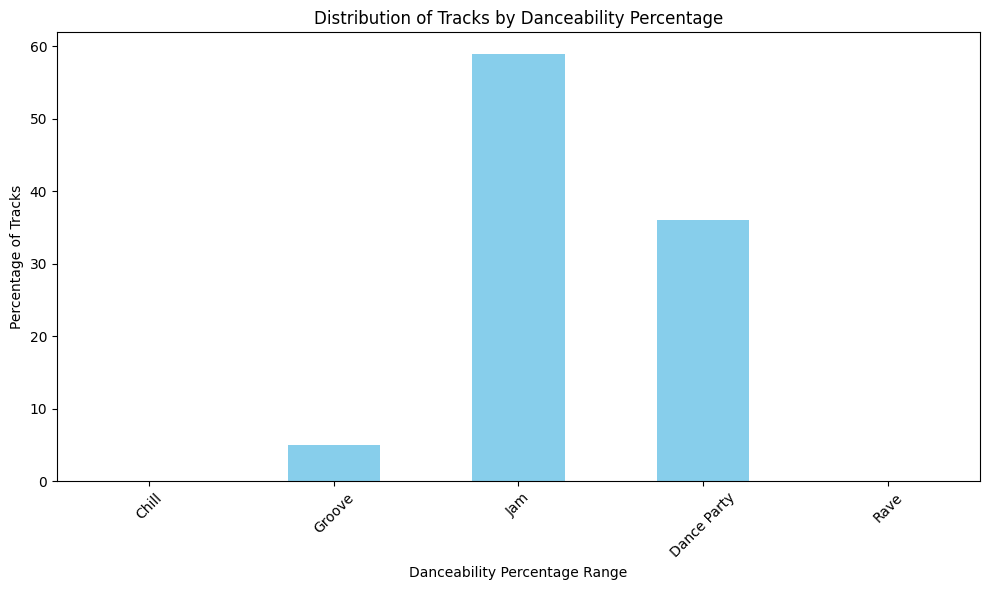

In [52]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Chill', 'Groove', 'Jam', 'Dance Party', 'Rave']

# Categorize the popularity
df['Danceability_Group'] = pd.cut(df['Danceability'], bins=bins, labels=labels, right=False)

# Calculate the percentage of tracks in each category
avg_rank_by_danceability = df['Danceability_Group'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_rank_by_danceability.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Danceability Percentage Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Danceability Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


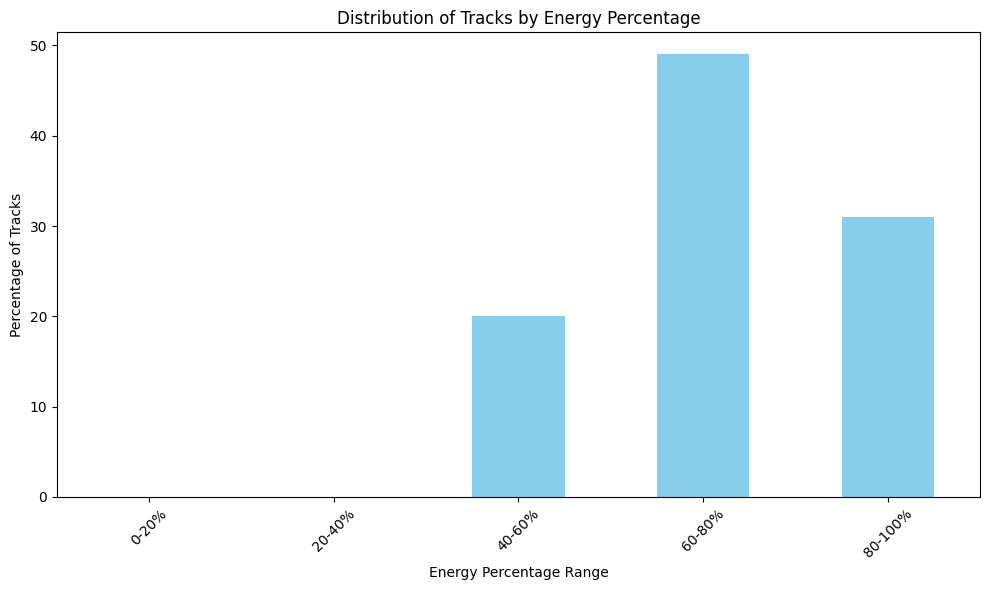

In [37]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Categorize the popularity
df['Energy_Group'] = pd.cut(df['Energy'], bins=bins, labels=labels, right=False)

# Calculate the percentage of tracks in each category
avg_rank_by_energy = df['Energy_Group'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_rank_by_energy.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Energy Percentage Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Energy Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

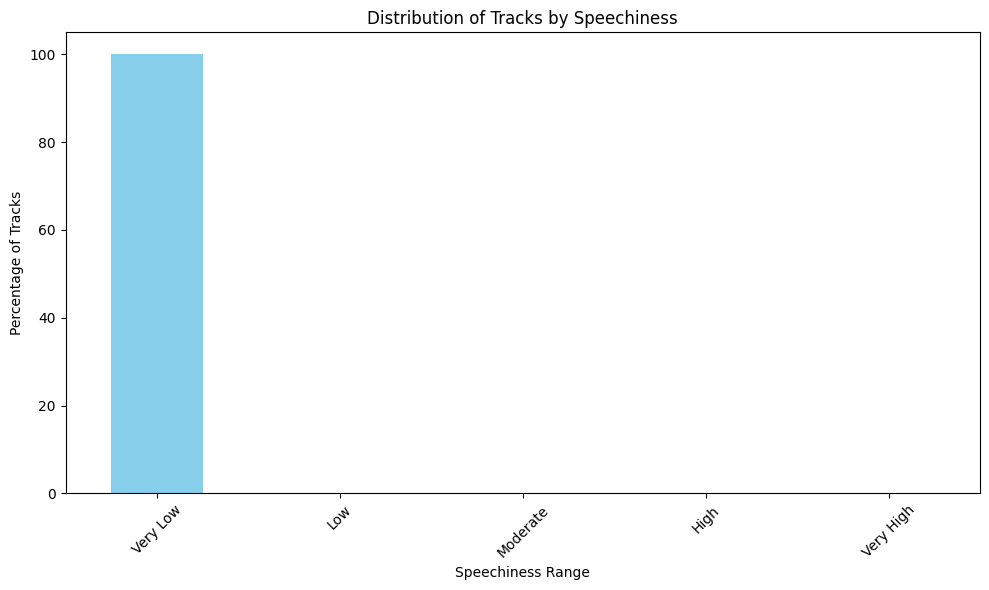

In [53]:
# Analyze distribution of music style features

# Analyze Speechiness
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

df['Speechiness_Group'] = pd.cut(df['Speechiness'], bins=bins, labels=labels, right=False)
avg_rank_by_speechiness = df['Speechiness_Group'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
avg_rank_by_speechiness.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Speechiness Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Speechiness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


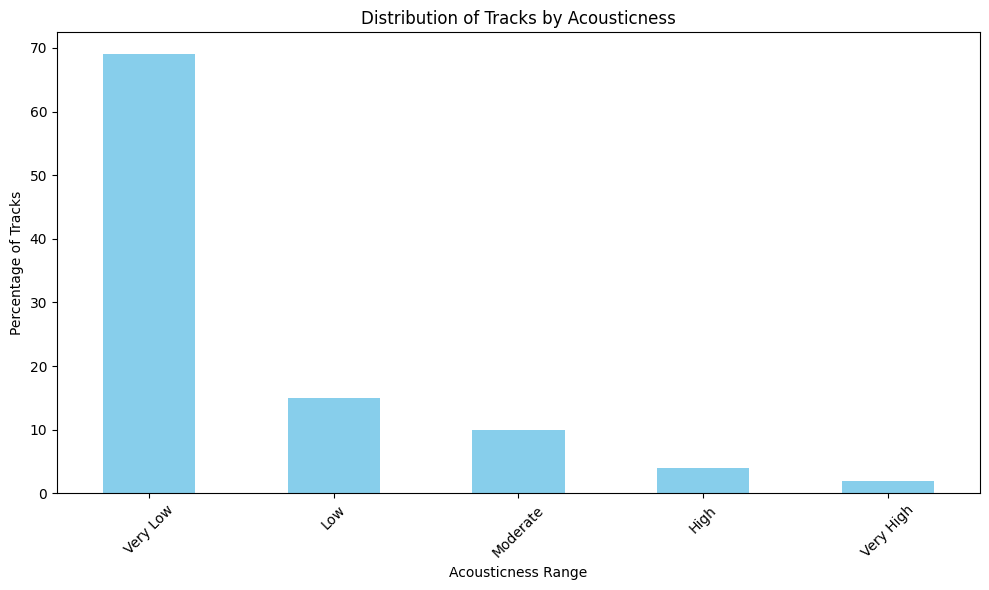

In [54]:

# Analyze Acousticness 
df['Acousticness_Group'] = pd.cut(df['Acousticness'], bins=bins, labels=labels, right=False)
avg_rank_by_acousticness = df['Acousticness_Group'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
avg_rank_by_acousticness.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Acousticness Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Acousticness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


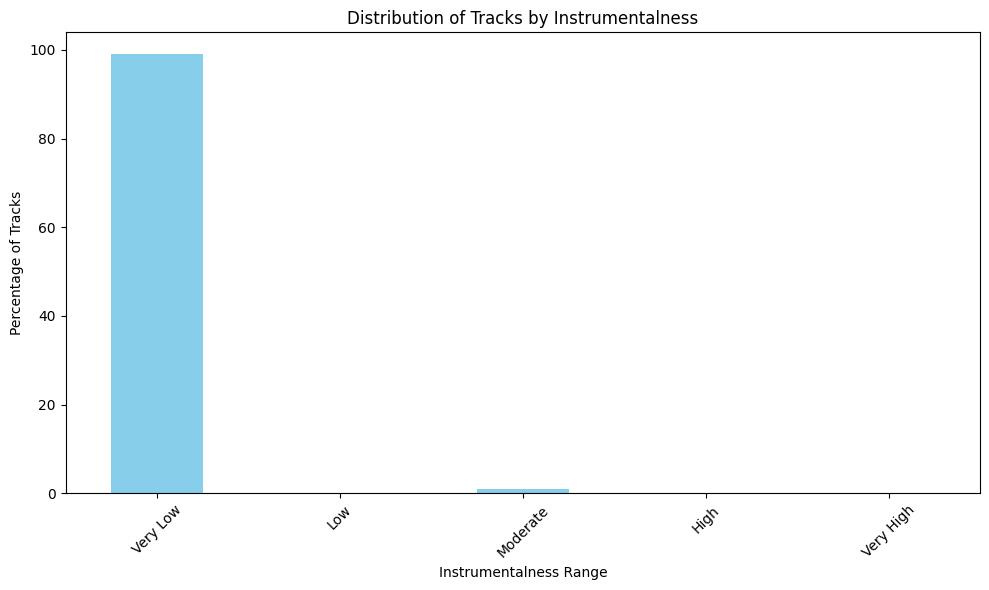

In [55]:

# Analyze Instrumentalness
df['Instrumentalness_Group'] = pd.cut(df['Instrumentalness'], bins=bins, labels=labels, right=False)
avg_rank_by_instrumentalness = df['Instrumentalness_Group'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
avg_rank_by_instrumentalness.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Instrumentalness Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Instrumentalness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


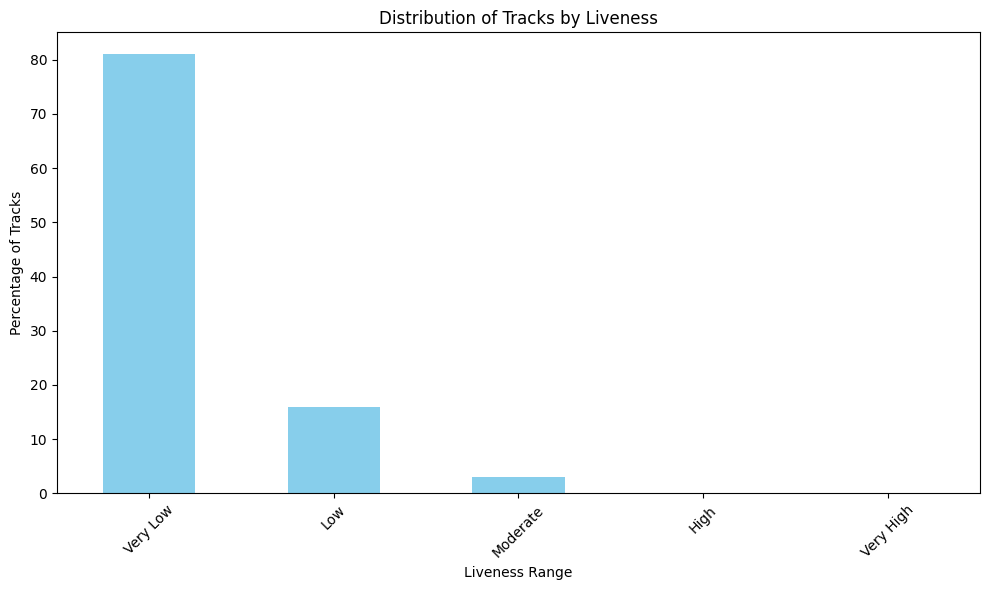

In [56]:

# Analyze Liveness
df['Liveness_Group'] = pd.cut(df['Liveness'], bins=bins, labels=labels, right=False)
avg_rank_by_liveness = df['Liveness_Group'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
avg_rank_by_liveness.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Liveness Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Liveness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


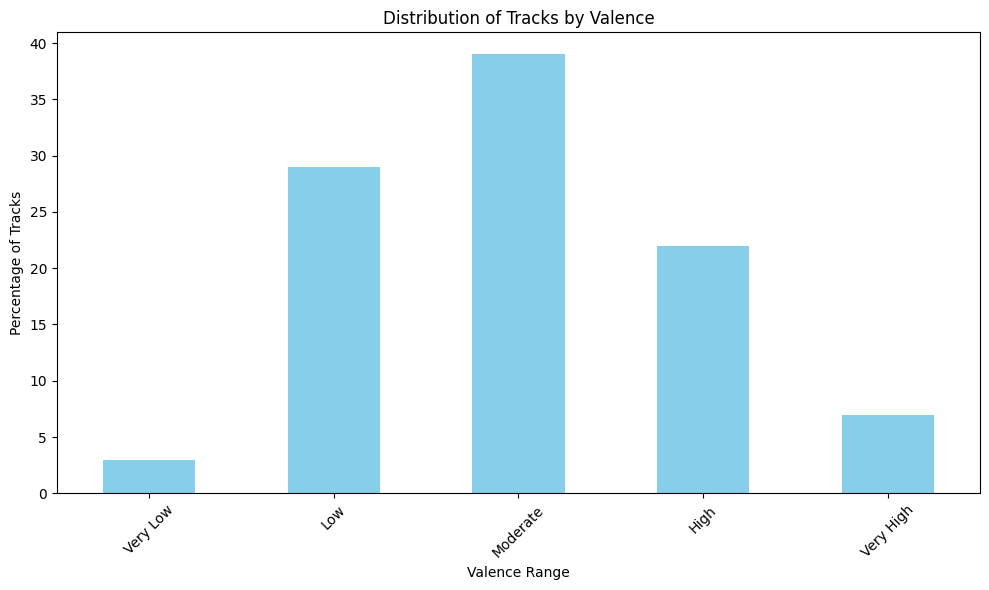

In [57]:

# Analyze Valence
df['Valence_Group'] = pd.cut(df['Valence'], bins=bins, labels=labels, right=False)
avg_rank_by_valence = df['Valence_Group'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
avg_rank_by_valence.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Valence Range')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Valence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



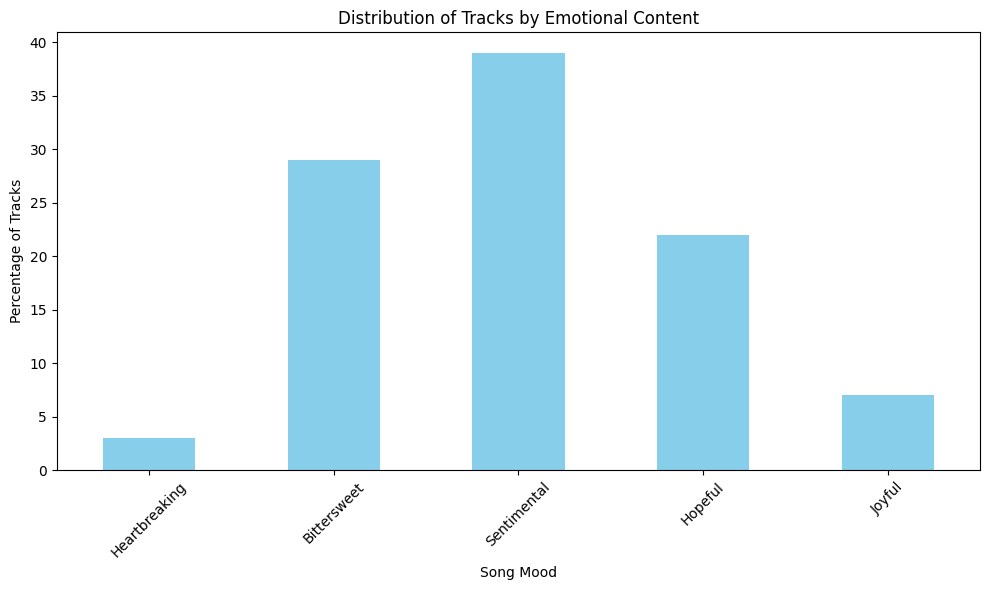

In [60]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
# Changed labels to more descriptive emotional terms
labels = ['Heartbreaking', 'Bittersweet', 'Sentimental', 'Hopeful', 'Joyful']

# Categorize
df['Valence_Group'] = pd.cut(df['Valence'], bins=bins, labels=labels, right=False)
avg_rank_by_valence = df['Valence_Group'].value_counts(normalize=True) * 100

# Plot remains the same
plt.figure(figsize=(10, 6))
avg_rank_by_valence.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Song Mood')  # Updated x-axis label
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Emotional Content')  # Updated title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

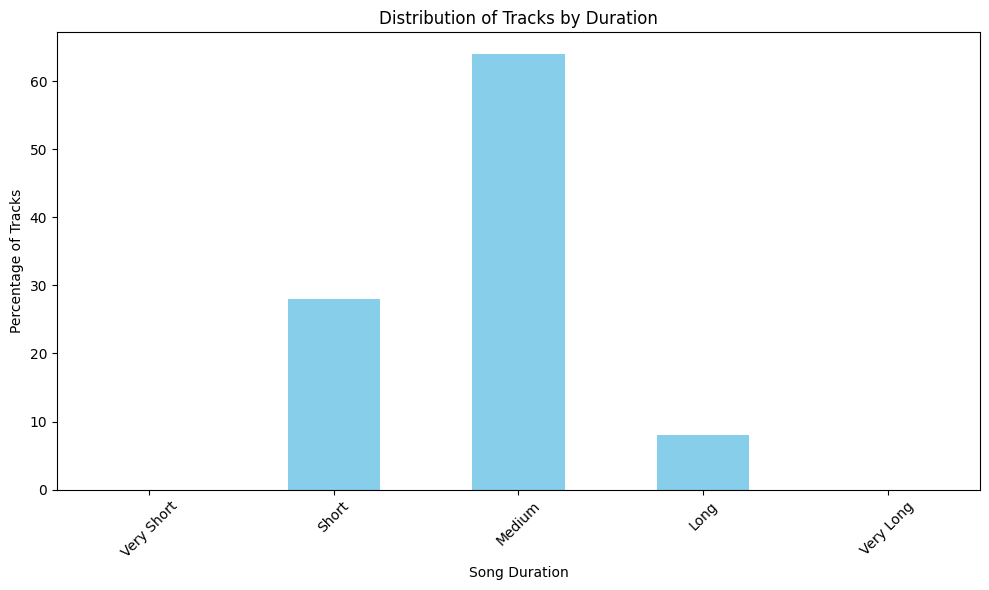

In [61]:
# Analyze duration distribution
bins = [0, 120000, 180000, 240000, 300000, float('inf')]  # Duration intervals in milliseconds
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# Categorize durations
df['Duration_Group'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=False)
duration_dist = df['Duration_Group'].value_counts(normalize=True) * 100

# Plot duration distribution
plt.figure(figsize=(10, 6))
duration_dist.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Song Duration')
plt.ylabel('Percentage of Tracks')
plt.title('Distribution of Tracks by Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



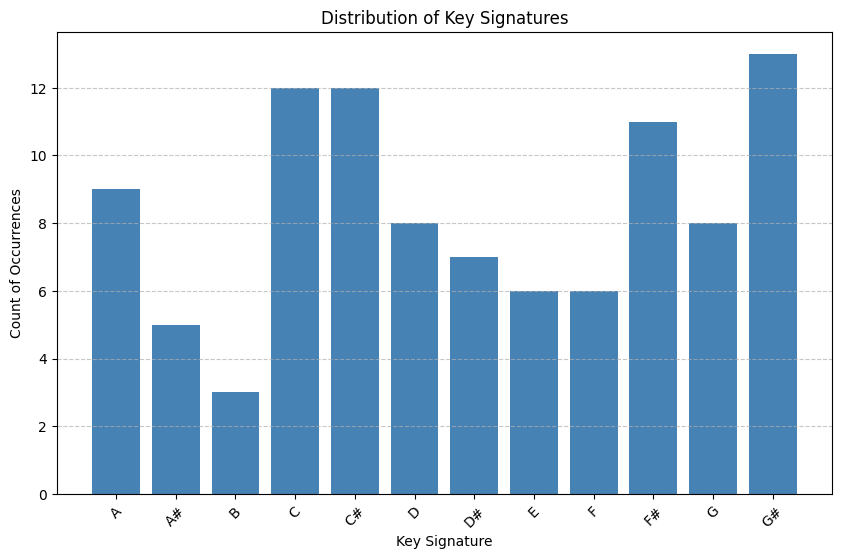

In [48]:
key_mapping = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F',
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}

# Create a new column with key signatures as letters
df['Key Signature'] = df['Key'].map(key_mapping)

# Count occurrences of each key signature
key_counts = df['Key Signature'].value_counts()

# Create a DataFrame for sorting
key_counts_df = pd.DataFrame({'Key Signature': key_counts.index, 'Count': key_counts.values})

# Define the order of key signatures
key_order = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

# Sort the DataFrame by the defined key order
key_counts_df['Key Signature'] = pd.Categorical(key_counts_df['Key Signature'], categories=key_order, ordered=True)
key_counts_df = key_counts_df.sort_values(by='Key Signature')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(key_counts_df['Key Signature'], key_counts_df['Count'], color='steelblue')
plt.xlabel('Key Signature')
plt.ylabel('Count of Occurrences')
plt.title('Distribution of Key Signatures')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



# Selecting features
features = ['Popularity', 'Duration', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness']
X = df[features]

# Target variable (binary classification: let's say we classify popularity > 80 as popular)
y = df['Popularity'].apply(lambda x: 1 if x > 80 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20

Confusion Matrix:
[[17  0]
 [ 2  1]]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Key Findings and Data Analysis Summary:

### Artist Analysis
- 18 songs in the TOP 100 are collaborations, representing 18%
- Morgan Wallen has 11 songs: 8 as lead artist, 3 as featured artist
- Luke Combs has 7 songs: 6 as lead artist, 1 as featured artist

### Song Ranking and Feature Analysis
- No significant direct correlation between song ranking and musical style characteristics
- Song Popularity Distribution:
  * Over 50% of songs have popularity between 60-80%
  * About 25% fall between 40-60%
  * 10% are in the 80-100% range
  * No songs below 20% popularity

### Detailed Musical Characteristics Analysis

#### Rhythm and Energy
- Danceability:
  * 65% of songs fall between 0.5-0.6
  * 20% below 0.5
  * 15% above 0.6
- Energy:
  * 70% of tracks have energy levels between 0.6-0.8
  * 20% above 0.8
  * 10% below 0.6
- Tempo:
  * 60% of songs between 100-140 BPM
  * 25% below 100 BPM
  * 15% above 140 BPM

#### Sound Characteristics
- Speechiness:
  * 75% of songs show low speechiness (0.03-0.05)
  * Only 25% have higher values
- Acousticness:
  * 80% of tracks below 0.2
  * Only 20% show higher acoustic properties
- Instrumentalness:
  * 90% of songs near 0, indicating vocal dominance
- Liveness:
  * 85% between 0.1-0.2, suggesting studio recordings
- Valence:
  * 40% between 0.4-0.6
  * 30% below 0.4
  * 30% above 0.6

### Language and Geographic Distribution
- 98% of songs are in English
- 95% of artists are from the United States

### Key Conclusions
1. Country music demonstrates strong consistency in production style, primarily studio-based
2. Most songs maintain moderate danceability with high energy levels
3. The genre emphasizes vocal performance with minimal pure instrumental sections
4. Clear dominance of English content and American artists
5. Tempo distribution indicates moderate rhythms suitable for both listening and dancing





